In [ ]:
#  Загрузка и установка модуля Spark для дальнейшей работы
! pip install --upgrade pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 47 kB/s 
     |████████████████████████████████| 199 kB 41.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=3c12c4a58562d46aa18707e9e560eb897a96fd93a94e4dfc58055f38be1e7fa6
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
# SparkSession — это способ инициализации базовой функциональности PySpark для программного создания PySpark RDD, DataFrame и Dataset. Из библиотеки мы ипортируем SparkSession
from pyspark.sql import SparkSession

**Использование SQL**

In [ ]:
# Подготовка к работе с определенными параметрами (Spark)
spark = SparkSession.builder.getOrCreate()

In [ ]:
# Установка функции gdown для загрузки файла
! pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=76490661fc67d4e017333b2331489d0624a14c30c4aea4f1a16066c3c4a3d9d3
  Stored in directory: /root/.cache/pip/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# Загрузка файла через функцию gdown
! gdown 1Lyow-PiRItU4lT-Dr5yZS0HQj59fmNod

Downloading...
From: https://drive.google.com/uc?id=1Lyow-PiRItU4lT-Dr5yZS0HQj59fmNod
To: /content/location_temp.csv
100% 14.9M/14.9M [00:00<00:00, 63.5MB/s]


In [ ]:
# Датафрейм читаем через эту функцию spark.read.format с форматом csv, через load загрузка файла
df_location = spark.read.format('csv').options(header=True).load('./location_temp.csv')

In [ ]:
# Выводим  первые 10 строк
df_location.head(10)

[Row(event_date='03/04/2019 19:48:06', location_id='loc0', temp_celcius='29'),
 Row(event_date='03/04/2019 19:53:06', location_id='loc0', temp_celcius='27'),
 Row(event_date='03/04/2019 19:58:06', location_id='loc0', temp_celcius='28'),
 Row(event_date='03/04/2019 20:03:06', location_id='loc0', temp_celcius='30'),
 Row(event_date='03/04/2019 20:08:06', location_id='loc0', temp_celcius='27'),
 Row(event_date='03/04/2019 20:13:06', location_id='loc0', temp_celcius='27'),
 Row(event_date='03/04/2019 20:18:06', location_id='loc0', temp_celcius='27'),
 Row(event_date='03/04/2019 20:23:06', location_id='loc0', temp_celcius='29'),
 Row(event_date='03/04/2019 20:28:06', location_id='loc0', temp_celcius='32'),
 Row(event_date='03/04/2019 20:33:06', location_id='loc0', temp_celcius='35')]

In [ ]:
# показываем дата сет(выводится только 20 строк)
df_location.show()

+-------------------+-----------+------------+
|         event_date|location_id|temp_celcius|
+-------------------+-----------+------------+
|03/04/2019 19:48:06|       loc0|          29|
|03/04/2019 19:53:06|       loc0|          27|
|03/04/2019 19:58:06|       loc0|          28|
|03/04/2019 20:03:06|       loc0|          30|
|03/04/2019 20:08:06|       loc0|          27|
|03/04/2019 20:13:06|       loc0|          27|
|03/04/2019 20:18:06|       loc0|          27|
|03/04/2019 20:23:06|       loc0|          29|
|03/04/2019 20:28:06|       loc0|          32|
|03/04/2019 20:33:06|       loc0|          35|
|03/04/2019 20:38:06|       loc0|          32|
|03/04/2019 20:43:06|       loc0|          28|
|03/04/2019 20:48:06|       loc0|          28|
|03/04/2019 20:53:06|       loc0|          32|
|03/04/2019 20:58:06|       loc0|          34|
|03/04/2019 21:03:06|       loc0|          33|
|03/04/2019 21:08:06|       loc0|          27|
|03/04/2019 21:13:06|       loc0|          28|
|03/04/2019 2

In [ ]:
# Информацию по столбцам
display(df_location)

DataFrame[event_date: string, location_id: string, temp_celcius: string]

In [ ]:
# Вывод количества строк
df_location.count()

500000

In [ ]:
# Загрузка файла
! gdown 1v0NQQLBlvxT6_igtkONstoTqi64cSxcw

Downloading...
From: https://drive.google.com/uc?id=1v0NQQLBlvxT6_igtkONstoTqi64cSxcw
To: /content/utilization.csv
100% 18.5M/18.5M [00:00<00:00, 99.3MB/s]


In [ ]:
df_util = spark.read.format('csv').options(header=False, inferSchema=True).load('./utilization.csv')

In [ ]:
df_util.count()

500000

In [ ]:
# поскольку заголовок отсутствует, spark автоматически сгенерирует имена столбцов
df_util.head(5)

[Row(_c0='03/05/2019 08:06:14', _c1=100, _c2=0.57, _c3=0.51, _c4=47),
 Row(_c0='03/05/2019 08:11:14', _c1=100, _c2=0.47, _c3=0.62, _c4=43),
 Row(_c0='03/05/2019 08:16:14', _c1=100, _c2=0.56, _c3=0.57, _c4=62),
 Row(_c0='03/05/2019 08:21:14', _c1=100, _c2=0.57, _c3=0.56, _c4=50),
 Row(_c0='03/05/2019 08:26:14', _c1=100, _c2=0.35, _c3=0.46, _c4=43)]

In [ ]:
# Показ строк(10 строк)
df_util.show(10)

+-------------------+---+----+----+---+
|                _c0|_c1| _c2| _c3|_c4|
+-------------------+---+----+----+---+
|03/05/2019 08:06:14|100|0.57|0.51| 47|
|03/05/2019 08:11:14|100|0.47|0.62| 43|
|03/05/2019 08:16:14|100|0.56|0.57| 62|
|03/05/2019 08:21:14|100|0.57|0.56| 50|
|03/05/2019 08:26:14|100|0.35|0.46| 43|
|03/05/2019 08:31:14|100|0.41|0.58| 48|
|03/05/2019 08:36:14|100|0.57|0.35| 58|
|03/05/2019 08:41:14|100|0.41| 0.4| 58|
|03/05/2019 08:46:14|100|0.53|0.35| 62|
|03/05/2019 08:51:14|100|0.51| 0.6| 45|
+-------------------+---+----+----+---+
only showing top 10 rows



**Переименование имен столбцов и работа с ними.**

In [ ]:
# Каждый столбец мы переименовываем для нашего удобства
df_util = df_util.withColumnRenamed('_c0', 'event_datetime') \
                        .withColumnRenamed('_c1', 'server_id') \
                        .withColumnRenamed('_c2', 'cpu') \
                        .withColumnRenamed('_c3', 'free_memory') \
                        .withColumnRenamed('_c4', 'session_count')

In [ ]:
# Вывод строк уже с названиями столбцов
df_util.show(5)

+-------------------+---------+----+-----------+-------------+
|     event_datetime|server_id| cpu|free_memory|session_count|
+-------------------+---------+----+-----------+-------------+
|03/05/2019 08:06:14|      100|0.57|       0.51|           47|
|03/05/2019 08:11:14|      100|0.47|       0.62|           43|
|03/05/2019 08:16:14|      100|0.56|       0.57|           62|
|03/05/2019 08:21:14|      100|0.57|       0.56|           50|
|03/05/2019 08:26:14|      100|0.35|       0.46|           43|
+-------------------+---------+----+-----------+-------------+
only showing top 5 rows



In [ ]:
# Загрузка файла
! gdown 12x2rvs4JTk8ivO15JRfL8fEreQGSapyY

Downloading...
From: https://drive.google.com/uc?id=12x2rvs4JTk8ivO15JRfL8fEreQGSapyY
To: /content/utilization.json
100% 1.12k/1.12k [00:00<00:00, 1.37MB/s]


In [ ]:
# Читаем файл с определенным форматом
df = spark.read.format('json').load('./utilization.json')

In [ ]:
# Подсчет
df.count()

10

In [ ]:
# Показ информации
df.show()

+----+-------------------+-----------+---------+-------------+
| cpu|     event_datetime|free_memory|server_id|session_count|
+----+-------------------+-----------+---------+-------------+
|0.57|03/05/2019 08:06:14|       0.51|      100|           47|
|0.47|03/05/2019 08:11:14|       0.62|      100|           43|
|0.56|03/05/2019 08:16:14|       0.57|      100|           62|
|0.57|03/05/2019 08:21:14|       0.56|      100|           50|
|0.35|03/05/2019 08:26:14|       0.46|      100|           43|
|0.57|03/05/2019 08:06:14|       0.51|      200|           47|
|0.47|03/05/2019 08:11:14|       0.62|      200|           43|
|0.56|03/05/2019 08:16:14|       0.57|      200|           62|
|0.57|03/05/2019 08:21:14|       0.56|      200|           50|
|0.35|03/05/2019 08:26:14|       0.46|      200|           43|
+----+-------------------+-----------+---------+-------------+



In [ ]:
# Выведение одной строки
df.head()

Row(cpu=0.57, event_datetime='03/05/2019 08:06:14', free_memory=0.51, server_id=100, session_count=47)

In [ ]:
# Вывод колонок, которые есть в датафрейме
df.columns

['cpu', 'event_datetime', 'free_memory', 'server_id', 'session_count']

In [ ]:
# Вывод строки по условию (получить выборку без замены для 20% исходного набора данных)
df_sample = df.sample(False, 0.2)

In [ ]:
df_sample.show()

+---+--------------+-----------+---------+-------------+
|cpu|event_datetime|free_memory|server_id|session_count|
+---+--------------+-----------+---------+-------------+
+---+--------------+-----------+---------+-------------+



**Сортировка данных**

In [ ]:
df.show()

+----+-------------------+-----------+---------+-------------+
| cpu|     event_datetime|free_memory|server_id|session_count|
+----+-------------------+-----------+---------+-------------+
|0.57|03/05/2019 08:06:14|       0.51|      100|           47|
|0.47|03/05/2019 08:11:14|       0.62|      100|           43|
|0.56|03/05/2019 08:16:14|       0.57|      100|           62|
|0.57|03/05/2019 08:21:14|       0.56|      100|           50|
|0.35|03/05/2019 08:26:14|       0.46|      100|           43|
|0.57|03/05/2019 08:06:14|       0.51|      200|           47|
|0.47|03/05/2019 08:11:14|       0.62|      200|           43|
|0.56|03/05/2019 08:16:14|       0.57|      200|           62|
|0.57|03/05/2019 08:21:14|       0.56|      200|           50|
|0.35|03/05/2019 08:26:14|       0.46|      200|           43|
+----+-------------------+-----------+---------+-------------+



In [ ]:
# сортировка по количеству сеансов в порядке убывания
df_sorted = df.sort('session_count', ascending=False)

In [ ]:
# Вывод
df_sorted.show()

+----+-------------------+-----------+---------+-------------+
| cpu|     event_datetime|free_memory|server_id|session_count|
+----+-------------------+-----------+---------+-------------+
|0.56|03/05/2019 08:16:14|       0.57|      100|           62|
|0.56|03/05/2019 08:16:14|       0.57|      200|           62|
|0.57|03/05/2019 08:21:14|       0.56|      100|           50|
|0.57|03/05/2019 08:21:14|       0.56|      200|           50|
|0.57|03/05/2019 08:06:14|       0.51|      100|           47|
|0.57|03/05/2019 08:06:14|       0.51|      200|           47|
|0.47|03/05/2019 08:11:14|       0.62|      100|           43|
|0.35|03/05/2019 08:26:14|       0.46|      100|           43|
|0.47|03/05/2019 08:11:14|       0.62|      200|           43|
|0.35|03/05/2019 08:26:14|       0.46|      200|           43|
+----+-------------------+-----------+---------+-------------+



**Получение уникальных локаций**

In [ ]:
df_location.select('location_id').distinct().show()

+-----------+
|location_id|
+-----------+
|     loc196|
|     loc226|
|     loc150|
|     loc292|
|     loc311|
|      loc22|
|      loc31|
|     loc305|
|      loc82|
|      loc90|
|     loc118|
|     loc195|
|     loc208|
|      loc39|
|      loc75|
|     loc228|
|     loc203|
|     loc193|
|     loc122|
|     loc145|
+-----------+
only showing top 20 rows



**Фильтр для конкретных условий**

In [ ]:
# получить строки, в которых идентификатор местоположения равен 22.
df_location.filter(df_location['location_id'] == 'loc22').show()

+-------------------+-----------+------------+
|         event_date|location_id|temp_celcius|
+-------------------+-----------+------------+
|03/04/2019 19:48:10|      loc22|          30|
|03/04/2019 19:53:10|      loc22|          30|
|03/04/2019 19:58:10|      loc22|          26|
|03/04/2019 20:03:10|      loc22|          27|
|03/04/2019 20:08:10|      loc22|          29|
|03/04/2019 20:13:10|      loc22|          27|
|03/04/2019 20:18:10|      loc22|          26|
|03/04/2019 20:23:10|      loc22|          35|
|03/04/2019 20:28:10|      loc22|          27|
|03/04/2019 20:33:10|      loc22|          26|
|03/04/2019 20:38:10|      loc22|          30|
|03/04/2019 20:43:10|      loc22|          29|
|03/04/2019 20:48:10|      loc22|          28|
|03/04/2019 20:53:10|      loc22|          27|
|03/04/2019 20:58:10|      loc22|          26|
|03/04/2019 21:03:10|      loc22|          29|
|03/04/2019 21:08:10|      loc22|          32|
|03/04/2019 21:13:10|      loc22|          26|
|03/04/2019 2

**Подсчет отфильтрованных строк**

In [ ]:
df_location.filter(df_location['location_id'] == 'loc22').count()

1000

In [ ]:
df_location.filter(df_location['location_id'] == 'loc196').count()

1000

**Группировка**

In [ ]:
# Мы хотим знать, сколько измерений у нас есть для каждого местоположения.
df_location.groupBy('location_id').count().show()

+-----------+-----+
|location_id|count|
+-----------+-----+
|     loc196| 1000|
|     loc226| 1000|
|     loc150| 1000|
|     loc292| 1000|
|     loc311| 1000|
|      loc22| 1000|
|      loc31| 1000|
|     loc305| 1000|
|      loc82| 1000|
|      loc90| 1000|
|     loc118| 1000|
|     loc195| 1000|
|     loc208| 1000|
|      loc39| 1000|
|      loc75| 1000|
|     loc228| 1000|
|     loc203| 1000|
|     loc193| 1000|
|     loc122| 1000|
|     loc145| 1000|
+-----------+-----+
only showing top 20 rows



**Порядок**

In [ ]:
# Порядок по location_id
df_location.orderBy('location_id').show()

+-------------------+-----------+------------+
|         event_date|location_id|temp_celcius|
+-------------------+-----------+------------+
|03/04/2019 21:23:06|       loc0|          28|
|03/04/2019 20:43:06|       loc0|          28|
|03/04/2019 21:18:06|       loc0|          33|
|03/04/2019 20:18:06|       loc0|          27|
|03/04/2019 20:38:06|       loc0|          32|
|03/04/2019 20:58:06|       loc0|          34|
|03/04/2019 21:13:06|       loc0|          28|
|03/04/2019 19:58:06|       loc0|          28|
|03/04/2019 20:13:06|       loc0|          27|
|03/04/2019 20:28:06|       loc0|          32|
|03/04/2019 20:33:06|       loc0|          35|
|03/04/2019 20:48:06|       loc0|          28|
|03/04/2019 20:53:06|       loc0|          32|
|03/04/2019 21:03:06|       loc0|          33|
|03/04/2019 21:08:06|       loc0|          27|
|03/04/2019 19:48:06|       loc0|          29|
|03/04/2019 19:53:06|       loc0|          27|
|03/04/2019 20:03:06|       loc0|          30|
|03/04/2019 2

**Объединение по группировке и порядку**

In [ ]:
# Мы хотим знать, сколько измерений у нас есть для каждого местоположения, отсортированного по идентификатору местоположения
df_location.groupBy('location_id').count().orderBy('location_id', ascending=True).show()

+-----------+-----+
|location_id|count|
+-----------+-----+
|       loc0| 1000|
|       loc1| 1000|
|      loc10| 1000|
|     loc100| 1000|
|     loc101| 1000|
|     loc102| 1000|
|     loc103| 1000|
|     loc104| 1000|
|     loc105| 1000|
|     loc106| 1000|
|     loc107| 1000|
|     loc108| 1000|
|     loc109| 1000|
|      loc11| 1000|
|     loc110| 1000|
|     loc111| 1000|
|     loc112| 1000|
|     loc113| 1000|
|     loc114| 1000|
|     loc115| 1000|
+-----------+-----+
only showing top 20 rows



**Агрегация / Агрегатная функция**

In [ ]:
# Мы хотим знать среднюю температуру в каждом месте.
df_location.groupBy('location_id').agg({'temp_celcius': 'mean'}).show()

+-----------+-----------------+
|location_id|avg(temp_celcius)|
+-----------+-----------------+
|     loc196|           29.225|
|     loc226|           25.306|
|     loc150|           32.188|
|     loc292|           29.159|
|     loc311|           24.308|
|      loc22|           28.251|
|      loc31|           25.196|
|     loc305|           27.314|
|      loc82|           27.355|
|      loc90|           23.216|
|     loc118|           24.219|
|     loc195|            27.25|
|     loc208|           26.206|
|      loc39|           25.199|
|      loc75|           23.209|
|     loc228|           27.295|
|     loc203|           26.214|
|     loc193|           30.225|
|     loc122|            32.36|
|     loc145|           32.309|
+-----------+-----------------+
only showing top 20 rows



In [ ]:
df_location.groupBy('location_id').agg({'temp_celcius': 'avg'}).show()

+-----------+-----------------+
|location_id|avg(temp_celcius)|
+-----------+-----------------+
|     loc196|           29.225|
|     loc226|           25.306|
|     loc150|           32.188|
|     loc292|           29.159|
|     loc311|           24.308|
|      loc22|           28.251|
|      loc31|           25.196|
|     loc305|           27.314|
|      loc82|           27.355|
|      loc90|           23.216|
|     loc118|           24.219|
|     loc195|            27.25|
|     loc208|           26.206|
|      loc39|           25.199|
|      loc75|           23.209|
|     loc228|           27.295|
|     loc203|           26.214|
|     loc193|           30.225|
|     loc122|            32.36|
|     loc145|           32.309|
+-----------+-----------------+
only showing top 20 rows



In [ ]:
# Группировка по location_id и выводится temp_celcius среднее значение, по порядку и вывод
df_location.groupBy('location_id').agg({'temp_celcius': 'mean'}).orderBy('location_id', ascending=True).show()

+-----------+-----------------+
|location_id|avg(temp_celcius)|
+-----------+-----------------+
|       loc0|           29.176|
|       loc1|           28.246|
|      loc10|           25.337|
|     loc100|           27.297|
|     loc101|           25.317|
|     loc102|           30.327|
|     loc103|           25.341|
|     loc104|           26.204|
|     loc105|           26.217|
|     loc106|           27.201|
|     loc107|           33.268|
|     loc108|           32.195|
|     loc109|           24.138|
|      loc11|           25.308|
|     loc110|           26.239|
|     loc111|           31.391|
|     loc112|           33.359|
|     loc113|           30.345|
|     loc114|           29.261|
|     loc115|           23.239|
+-----------+-----------------+
only showing top 20 rows



In [ ]:
# Группировка по location_id и по temp_celcius, выводится максимальное значение
df_location.groupBy('location_id').agg({'temp_celcius': 'max'}).show()

+-----------+-----------------+
|location_id|max(temp_celcius)|
+-----------+-----------------+
|       loc0|               36|
|       loc1|               35|
|      loc10|               32|
|     loc100|               34|
|     loc101|               32|
|     loc102|               37|
|     loc103|               32|
|     loc104|               33|
|     loc105|               33|
|     loc106|               34|
|     loc107|               40|
|     loc108|               39|
|     loc109|               31|
|      loc11|               32|
|     loc110|               33|
|     loc111|               38|
|     loc112|               40|
|     loc113|               37|
|     loc114|               36|
|     loc115|               30|
+-----------+-----------------+
only showing top 20 rows



**Описательная статистика**

In [ ]:
# Группировка по location_id и temp_celcius, выводится среднее
df_location.groupBy('location_id').agg({'temp_celcius': 'mean'}).show()

+-----------+-----------------+
|location_id|avg(temp_celcius)|
+-----------+-----------------+
|     loc196|           29.225|
|     loc226|           25.306|
|     loc150|           32.188|
|     loc292|           29.159|
|     loc311|           24.308|
|      loc22|           28.251|
|      loc31|           25.196|
|     loc305|           27.314|
|      loc82|           27.355|
|      loc90|           23.216|
|     loc118|           24.219|
|     loc195|            27.25|
|     loc208|           26.206|
|      loc39|           25.199|
|      loc75|           23.209|
|     loc228|           27.295|
|     loc203|           26.214|
|     loc193|           30.225|
|     loc122|            32.36|
|     loc145|           32.309|
+-----------+-----------------+
only showing top 20 rows



In [ ]:
# среднее значение температуры для каждого местоположения в порядке возрастания местоположения
df_location.groupBy('location_id').agg({'temp_celcius': 'mean'}).orderBy('location_id').show(10)

+-----------+-----------------+
|location_id|avg(temp_celcius)|
+-----------+-----------------+
|       loc0|           29.176|
|       loc1|           28.246|
|      loc10|           25.337|
|     loc100|           27.297|
|     loc101|           25.317|
|     loc102|           30.327|
|     loc103|           25.341|
|     loc104|           26.204|
|     loc105|           26.217|
|     loc106|           27.201|
+-----------+-----------------+
only showing top 10 rows



**Сохранение CSV-файла на диске**

In [ ]:
df_location.write.csv('temp_data.csv')

In [ ]:
# Использование команды оболочки для проверки файла
! ls temp_data.csv

part-00000-c70969b1-baf2-4f9e-877e-ed08d53c2558-c000.csv  _SUCCESS
part-00001-c70969b1-baf2-4f9e-877e-ed08d53c2558-c000.csv


In [ ]:
# Сохраните файл JSON на диск
df_location.write.json('temp_data.json')

In [ ]:
# Использование команды для проверки файла
! ls temp_data.json

part-00000-cb6a495f-ffaa-49c5-b2a8-6d0f825cf8c5-c000.json  _SUCCESS
part-00001-cb6a495f-ffaa-49c5-b2a8-6d0f825cf8c5-c000.json


**Работа с SQL в Spark**

In [ ]:
# создать временное представление с именем "использование"
df_util.createOrReplaceTempView('vw_utilization')

In [ ]:
# теперь мы можем выполнять запросы из этого созданного временного представления
results = spark.sql('SELECT server_id, session_count FROM vw_utilization LIMIT 5;')

In [ ]:
# Вывод результата
results.show()

+---------+-------------+
|server_id|session_count|
+---------+-------------+
|      100|           47|
|      100|           43|
|      100|           62|
|      100|           50|
|      100|           43|
+---------+-------------+



In [ ]:
#  Группируем server_id переименовывает элемент в sid, а session_count переименовывает элемент в  sc и берем эти данные из  vw_utilization, выводим 5 строк
results = spark.sql('SELECT server_id AS sid, session_count AS sc FROM vw_utilization LIMIT 5;')

In [ ]:
results.show()

+---+---+
|sid| sc|
+---+---+
|100| 47|
|100| 43|
|100| 62|
|100| 50|
|100| 43|
+---+---+



In [ ]:
# Группировка из данны vw_utilization где по условию server_id равен 100
results = spark.sql('SELECT * FROM vw_utilization WHERE server_id=100')

In [ ]:
results.show()

+-------------------+---------+----+-----------+-------------+
|     event_datetime|server_id| cpu|free_memory|session_count|
+-------------------+---------+----+-----------+-------------+
|03/05/2019 08:06:14|      100|0.57|       0.51|           47|
|03/05/2019 08:11:14|      100|0.47|       0.62|           43|
|03/05/2019 08:16:14|      100|0.56|       0.57|           62|
|03/05/2019 08:21:14|      100|0.57|       0.56|           50|
|03/05/2019 08:26:14|      100|0.35|       0.46|           43|
|03/05/2019 08:31:14|      100|0.41|       0.58|           48|
|03/05/2019 08:36:14|      100|0.57|       0.35|           58|
|03/05/2019 08:41:14|      100|0.41|        0.4|           58|
|03/05/2019 08:46:14|      100|0.53|       0.35|           62|
|03/05/2019 08:51:14|      100|0.51|        0.6|           45|
|03/05/2019 08:56:14|      100|0.32|       0.37|           47|
|03/05/2019 09:01:14|      100|0.62|       0.59|           60|
|03/05/2019 09:06:14|      100|0.66|       0.72|       

In [ ]:
# Подсчет строк
results.count()

10000

In [ ]:
# Группировка server_id, session_count из данных vw_utilization, где session_count больше 50
results = spark.sql('SELECT server_id, session_count \
                                FROM vw_utilization \
                                WHERE session_count > 50')

In [ ]:
results.show()

+---------+-------------+
|server_id|session_count|
+---------+-------------+
|      100|           62|
|      100|           58|
|      100|           58|
|      100|           62|
|      100|           60|
|      100|           57|
|      100|           66|
|      100|           65|
|      100|           66|
|      100|           63|
|      100|           70|
|      100|           63|
|      100|           55|
|      100|           59|
|      100|           56|
|      100|           52|
|      100|           61|
|      100|           59|
|      100|           60|
|      100|           57|
+---------+-------------+
only showing top 20 rows



**Агрегирование фреймов данных с помощью SQL**

In [ ]:
# Группировка и подсчет колонок из vw_utilization
count = spark.sql('SELECT count(*) AS total_count FROM vw_utilization')

In [ ]:
count.show()

+-----------+
|total_count|
+-----------+
|     500000|
+-----------+



In [ ]:
# Сгруппировать по  столбцу server_id из таблицы vw_utilization. Получить стобец total и количество таких записей с одинковыми значениями, назвать столбец server_id.
results = spark.sql('SELECT server_id, COUNT(*) AS total \
                                FROM vw_utilization \
                                GROUP BY server_id')

In [ ]:
results.show()

+---------+-----+
|server_id|total|
+---------+-----+
|      108|10000|
|      101|10000|
|      115|10000|
|      126|10000|
|      103|10000|
|      128|10000|
|      122|10000|
|      111|10000|
|      120|10000|
|      117|10000|
|      112|10000|
|      127|10000|
|      107|10000|
|      114|10000|
|      100|10000|
|      130|10000|
|      129|10000|
|      102|10000|
|      113|10000|
|      121|10000|
+---------+-----+
only showing top 20 rows



In [ ]:
# Сгруппировать по  столбцу server_id из таблицы vw_utilization. Получить стобец total и количество таких записей с одинковыми значениями, назвать столбец server_id.
#  При этом условие, где столбец session_count больше 50 
results = spark.sql('SELECT server_id, COUNT(*) AS total \
                                FROM vw_utilization \
                                WHERE session_count > 50 \
                                GROUP BY server_id')

In [ ]:
results.show()

+---------+-----+
|server_id|total|
+---------+-----+
|      108|10000|
|      101|10000|
|      115|10000|
|      126|10000|
|      103|10000|
|      128| 9421|
|      122|10000|
|      111| 8740|
|      120| 8561|
|      117| 9364|
|      112|10000|
|      127|10000|
|      107|10000|
|      114| 7865|
|      100| 6024|
|      130| 8571|
|      129| 8947|
|      102|10000|
|      113|10000|
|      121|10000|
+---------+-----+
only showing top 20 rows



In [ ]:
# минимальное, максимальное количество сеансов для каждого идентификатора сервера
results = spark.sql('SELECT server_id, min(session_count) AS min_session_count, max(session_count), avg(session_count) AS max_session_count \
                                FROM vw_utilization \
                                GROUP BY server_id')

In [ ]:
results.show()

+---------+-----------------+------------------+-----------------+
|server_id|min_session_count|max(session_count)|max_session_count|
+---------+-----------------+------------------+-----------------+
|      108|               65|               100|          82.2636|
|      101|               70|               105|          87.3264|
|      115|               54|                89|          71.4861|
|      126|               58|                93|          75.2583|
|      103|               66|               101|          83.5812|
|      128|               48|                83|          65.9306|
|      122|               53|                88|          70.1973|
|      111|               46|                81|          63.6968|
|      120|               45|                80|          62.7392|
|      117|               48|                83|          65.6906|
|      112|               62|                97|          79.0332|
|      127|               57|                92|          73.9

In [ ]:
# Загрузка файла
! gdown 1hGIJ-y_JCnnGayKKcvt8OobJPxtEQQwQ

Downloading...
From: https://drive.google.com/uc?id=1hGIJ-y_JCnnGayKKcvt8OobJPxtEQQwQ
To: /content/server_name.csv
100% 772/772 [00:00<00:00, 1.46MB/s]


In [ ]:
# Читаем файл в формате csv 
df_server = spark.read.format('csv').options(header=True).load('./server_name.csv')

In [ ]:
df_server.show(5)

+---------+-----------+
|server_id|server_name|
+---------+-----------+
|      100| 100 Server|
|      101| 101 Server|
|      102| 102 Server|
|      103| 103 Server|
|      104| 104 Server|
+---------+-----------+
only showing top 5 rows



In [ ]:
df_server.createOrReplaceTempView('vw_server')

**Уникальный идентификатор сервера**

In [ ]:
# Группировка для возврата значение не равных NULL по столбцу server_id из таблицы vw_utilization и сортировка по возрастанию
unique_server_id = spark.sql('SELECT DISTINCT(server_id) \
                              FROM vw_utilization \
                              ORDER BY server_id')

In [ ]:
unique_server_id.show()

+---------+
|server_id|
+---------+
|      100|
|      101|
|      102|
|      103|
|      104|
|      105|
|      106|
|      107|
|      108|
|      109|
|      110|
|      111|
|      112|
|      113|
|      114|
|      115|
|      116|
|      117|
|      118|
|      119|
+---------+
only showing top 20 rows



In [ ]:
# Вывод количества уникальных
unique_server_id.count()

50

**Каковы минимальные и максимальные идентификаторы сервера**

In [ ]:
# Сгруппировать по минимальному и максимальному значению по столбцу server_id из таблицы vw_utilization
spark.sql('SELECT min(server_id), max(server_id) FROM vw_utilization').show()

+--------------+--------------+
|min(server_id)|max(server_id)|
+--------------+--------------+
|           100|           149|
+--------------+--------------+



**Объединение двух представлений**

In [ ]:
# Сгруппировать по столбцам u.server_id, sn.server_name, u.session_count и объединить по vw_server sn ON sn.server_id = u.server_id(берется всё из таблицы vw_utilization u)
results = spark.sql('SELECT u.server_id, sn.server_name, u.session_count\
                FROM vw_utilization u \
                JOIN vw_server sn ON sn.server_id = u.server_id')

In [ ]:
results.show()

+---------+-----------+-------------+
|server_id|server_name|session_count|
+---------+-----------+-------------+
|      100| 100 Server|           47|
|      100| 100 Server|           43|
|      100| 100 Server|           62|
|      100| 100 Server|           50|
|      100| 100 Server|           43|
|      100| 100 Server|           48|
|      100| 100 Server|           58|
|      100| 100 Server|           58|
|      100| 100 Server|           62|
|      100| 100 Server|           45|
|      100| 100 Server|           47|
|      100| 100 Server|           60|
|      100| 100 Server|           57|
|      100| 100 Server|           44|
|      100| 100 Server|           47|
|      100| 100 Server|           66|
|      100| 100 Server|           65|
|      100| 100 Server|           66|
|      100| 100 Server|           42|
|      100| 100 Server|           63|
+---------+-----------+-------------+
only showing top 20 rows



**Каковы имена максимальные и минимальные по столбцам server_id**

In [ ]:
# Сгруппировать по столбцам sn.server_name, sn.server_id из таблицы vw_server sn, где группируем по минимальному значению столбца server_id из таблицы
spark.sql('SELECT  sn.server_name, sn.server_id \
                FROM vw_server sn\
                WHERE sn.server_id = (SELECT min(server_id) FROM vw_utilization)').show()

+-----------+---------+
|server_name|server_id|
+-----------+---------+
| 100 Server|      100|
+-----------+---------+



In [ ]:
# Сгруппировать по столбцам sn.server_name, sn.server_id из таблицы vw_server sn, где группируем по максимальному значению столбца server_id из таблицы
spark.sql('SELECT  sn.server_name, sn.server_id \
                FROM vw_server sn\
                WHERE sn.server_id = (SELECT max(server_id) FROM vw_utilization)').show()

+-----------+---------+
|server_name|server_id|
+-----------+---------+
| 149 Server|      149|
+-----------+---------+



In [ ]:
# Мы группируем по условиям максимального  и минимального значения и объединеям две строки 
spark.sql('(SELECT  sn.server_name, sn.server_id \
                FROM vw_server sn\
                WHERE sn.server_id = (SELECT max(server_id) FROM vw_utilization))\
                UNION\
                (SELECT  sn.server_name, sn.server_id \
                FROM vw_server sn\
                WHERE sn.server_id = (SELECT min(server_id) FROM vw_utilization))').show()

+-----------+---------+
|server_name|server_id|
+-----------+---------+
| 149 Server|      149|
| 100 Server|      100|
+-----------+---------+



**Удаление дублирования**

In [ ]:
# Импортируем из библиотеки SparkContext
from pyspark import SparkContext

In [ ]:
# создание новой базы или будет брать существующую
sc = SparkContext.getOrCreate()

In [ ]:
# Импорт из библиотек нужных функций
from pyspark.sql import Row
from pyspark.sql.functions import lit
from pyspark.sql.types import StringType

**Вручную создаем Фрейм Данных**

In [ ]:
df_dup = sc.parallelize([Row(server_name='101 server', cpu_utilization=85, session_count=80),\
                                     Row(server_name='101 server', cpu_utilization=80, session_count=90),\
                                     Row(server_name='102 server', cpu_utilization=85, session_count=80),\
                                     Row(server_name='102 server', cpu_utilization=85, session_count=80)
                                    ]).toDF()

In [ ]:
# вывод созданных данных
df_dup.show()

+-----------+---------------+-------------+
|server_name|cpu_utilization|session_count|
+-----------+---------------+-------------+
| 101 server|             85|           80|
| 101 server|             80|           90|
| 102 server|             85|           80|
| 102 server|             85|           80|
+-----------+---------------+-------------+



In [ ]:
# Убираем дубликаты
df_dup.drop_duplicates().show()

+-----------+---------------+-------------+
|server_name|cpu_utilization|session_count|
+-----------+---------------+-------------+
| 101 server|             85|           80|
| 101 server|             80|           90|
| 102 server|             85|           80|
+-----------+---------------+-------------+



In [ ]:
# # удаление повторяющихся строк на основе столбца "server_name"
df_dup.drop_duplicates(['server_name']).show()

+-----------+---------------+-------------+
|server_name|cpu_utilization|session_count|
+-----------+---------------+-------------+
| 101 server|             85|           80|
| 102 server|             85|           80|
+-----------+---------------+-------------+



**Работа с Null или NAs**

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [ ]:
# вручную создайте фрейм данных
df = sc.parallelize([
            Row(server_name='101 server', cpu_utilization=85, session_count=80),\
            Row(server_name='101 server', cpu_utilization=80, session_count=90),\
            Row(server_name='102 server', cpu_utilization=85, session_count=80),\
            Row(server_name='102 server', cpu_utilization=85, session_count=80)
]).toDF()

In [ ]:
df.show()

+-----------+---------------+-------------+
|server_name|cpu_utilization|session_count|
+-----------+---------------+-------------+
| 101 server|             85|           80|
| 101 server|             80|           90|
| 102 server|             85|           80|
| 102 server|             85|           80|
+-----------+---------------+-------------+



**Создайте новый фрейм данных с одним дополнительным столбцом**

In [ ]:
# добавьте новый столбец в исходный фрейм данных
# значение равно  None и приведено к типу строки
df_na = df.withColumn('na_column', lit(None).cast(StringType()))

In [ ]:
df_na.show()

+-----------+---------------+-------------+---------+
|server_name|cpu_utilization|session_count|na_column|
+-----------+---------------+-------------+---------+
| 101 server|             85|           80|     null|
| 101 server|             80|           90|     null|
| 102 server|             85|           80|     null|
| 102 server|             85|           80|     null|
+-----------+---------------+-------------+---------+



**Заполнение значения NA**

In [ ]:
# Заполнение значением А столбца NA
df_na.fillna('A').show()

+-----------+---------------+-------------+---------+
|server_name|cpu_utilization|session_count|na_column|
+-----------+---------------+-------------+---------+
| 101 server|             85|           80|        A|
| 101 server|             80|           90|        A|
| 102 server|             85|           80|        A|
| 102 server|             85|           80|        A|
+-----------+---------------+-------------+---------+



**Создайте новый фрейм данных со значением NA и значением, отличным от NA**

In [ ]:
# Заполнение и объединение
df2 = df_na.fillna('A').union(df_na)

In [ ]:
df2.show()

+-----------+---------------+-------------+---------+
|server_name|cpu_utilization|session_count|na_column|
+-----------+---------------+-------------+---------+
| 101 server|             85|           80|        A|
| 101 server|             80|           90|        A|
| 102 server|             85|           80|        A|
| 102 server|             85|           80|        A|
| 101 server|             85|           80|     null|
| 101 server|             80|           90|     null|
| 102 server|             85|           80|     null|
| 102 server|             85|           80|     null|
+-----------+---------------+-------------+---------+



In [ ]:
# Удаление значений
df2.na.drop().show()

+-----------+---------------+-------------+---------+
|server_name|cpu_utilization|session_count|na_column|
+-----------+---------------+-------------+---------+
| 101 server|             85|           80|        A|
| 101 server|             80|           90|        A|
| 102 server|             85|           80|        A|
| 102 server|             85|           80|        A|
+-----------+---------------+-------------+---------+



**Значения DropNA с использованием SQL**

In [ ]:
# Создание или заменить уже на готовое представление
df2.createOrReplaceTempView('vw_na_table')

In [ ]:
# Сгруппировать по таблице vw_na_table
spark.sql('SELECT * FROM vw_na_table').show()

+-----------+---------------+-------------+---------+
|server_name|cpu_utilization|session_count|na_column|
+-----------+---------------+-------------+---------+
| 101 server|             85|           80|        A|
| 101 server|             80|           90|        A|
| 102 server|             85|           80|        A|
| 102 server|             85|           80|        A|
| 101 server|             85|           80|     null|
| 101 server|             80|           90|     null|
| 102 server|             85|           80|     null|
| 102 server|             85|           80|     null|
+-----------+---------------+-------------+---------+



In [ ]:
# Сгруппировать из таблицы vw_na_table, где по условию столбец na_column не имеет значение NULL
spark.sql('SELECT * FROM vw_na_table\
               WHERE na_column IS NOT NULL \
              ').show()

+-----------+---------------+-------------+---------+
|server_name|cpu_utilization|session_count|na_column|
+-----------+---------------+-------------+---------+
| 101 server|             85|           80|        A|
| 101 server|             80|           90|        A|
| 102 server|             85|           80|        A|
| 102 server|             85|           80|        A|
+-----------+---------------+-------------+---------+



**Исследовательский анализ данных с помощью Spark API**

In [ ]:
# Описаниеиспользуемых данных
df_util.describe().show()

+-------+-------------------+------------------+-------------------+-------------------+------------------+
|summary|     event_datetime|         server_id|                cpu|        free_memory|     session_count|
+-------+-------------------+------------------+-------------------+-------------------+------------------+
|  count|             500000|            500000|             500000|             500000|            500000|
|   mean|               null|             124.5| 0.6205177399999797|0.37912809999999125|          69.59616|
| stddev|               null|14.430884120552715|0.15875173872913106|0.15830931278376184|14.850676696352798|
|    min|03/05/2019 08:06:14|               100|               0.22|                0.0|                32|
|    max|04/09/2019 01:22:46|               149|                1.0|               0.78|               105|
+-------+-------------------+------------------+-------------------+-------------------+------------------+



**Корреляция (взаимосвязь)**

In [ ]:
# Статическая корреляция по столбцу free_memory
df_util.stat.corr('cpu', 'free_memory')

-0.47047715730806805

In [ ]:
# Статическая корреляция по столбцу session_count
df_util.stat.corr('cpu', 'session_count')

0.5026799454107653

In [ ]:
# Статическая корреляция по столбцам 'free_memory', 'session_count'
df_util.stat.corr('free_memory', 'session_count')

-0.5008320848876696

**Наиболее часто встречающиеся Элементы или Ценности**

In [ ]:
# Выведение подсчета частых используемых элементов
df_util.stat.freqItems(['server_id', 'session_count']).show()

+--------------------+-----------------------+
| server_id_freqItems|session_count_freqItems|
+--------------------+-----------------------+
|[137, 146, 101, 1...|   [92, 101, 83, 104...|
+--------------------+-----------------------+



**Выборка**

In [ ]:
# Отбоп по условиям
sample_df = df_util.sample(withReplacement=False, fraction=0.2)

In [ ]:
# Вывод подсчета по отбору
sample_df.count()

99837

**Предварительный анализ данных с помощью Spark SQL**

In [ ]:
# сначала создайте представление, чтобы позже мы могли выполнять SQL-запросы
df_util.createOrReplaceTempView('vw_utilization')

In [ ]:
# Группировка по server_id, минимальному и максимальному cpu, stddev(cpu) из таблицы vw_utilization
results = spark.sql('SELECT server_id, min(cpu), max(cpu), stddev(cpu)\
                              FROM vw_utilization\
                              GROUP BY server_id')

In [ ]:
results.show()

+---------+--------+--------+-------------------+
|server_id|min(cpu)|max(cpu)|        stddev(cpu)|
+---------+--------+--------+-------------------+
|      108|    0.55|    0.95|0.11563100171171926|
|      101|     0.6|     1.0|0.11651726263197697|
|      115|    0.44|    0.84|0.11569664615014985|
|      126|    0.48|    0.88|0.11542612970702051|
|      103|    0.56|    0.96|0.11617507884178278|
|      128|    0.38|    0.78| 0.1153254132405078|
|      122|    0.43|    0.83|0.11563104329209034|
|      111|    0.36|    0.76|0.11530221569464506|
|      120|    0.35|    0.75|0.11586355920838642|
|      117|    0.38|    0.78|0.11534593941519553|
|      112|    0.52|    0.92|0.11528867845082576|
|      127|    0.47|    0.87|0.11577746913037888|
|      107|    0.45|    0.85|0.11597417369783877|
|      114|    0.33|    0.73|0.11510268816097273|
|      100|    0.27|    0.67| 0.1152264191787964|
|      130|    0.35|    0.75|0.11568834774246008|
|      129|    0.37|    0.77|0.11644328829064748|


**Мы хотим знать, сколько раз данные принадлежали конкретному сегменту.**

In [ ]:
# Группируем по столбцу server_id, где с помощью функции FLOOR, которая возвращает число равное числовому выражению, переименовываем столбец в bucket, и берем все из таблицы vw_utilization
spark.sql('SELECT server_id, FLOOR(cpu * 100 / 10) AS bucket\
              FROM vw_utilization').show()

+---------+------+
|server_id|bucket|
+---------+------+
|      100|     5|
|      100|     4|
|      100|     5|
|      100|     5|
|      100|     3|
|      100|     4|
|      100|     5|
|      100|     4|
|      100|     5|
|      100|     5|
|      100|     3|
|      100|     6|
|      100|     6|
|      100|     5|
|      100|     2|
|      100|     4|
|      100|     4|
|      100|     6|
|      100|     4|
|      100|     5|
+---------+------+
only showing top 20 rows



In [ ]:
# Группируем по столбцу server_id, где с помощью функции FLOOR, которая возвращает число равное числовому выражению, переименовываем столбец в bucket, , считаем по столбцу, который называем frequency. 
# Берем все из таблицы vw_utilization
results = spark.sql('SELECT FLOOR(cpu * 100 / 10) AS bucket, COUNT(*) AS frequency \
              FROM vw_utilization \
              GROUP BY bucket \
              ORDER BY bucket \
              ')

In [ ]:
results.show()

+------+---------+
|bucket|frequency|
+------+---------+
|     2|     8186|
|     3|    37029|
|     4|    68046|
|     5|   104910|
|     6|   116725|
|     7|    88242|
|     8|    56598|
|     9|    20207|
|    10|       57|
+------+---------+



**Визуализация данных**

In [ ]:
# Перевод результатов в формат библиотеки Pandas
pd_df = results.toPandas()

In [ ]:
pd_df.head()

,bucket,frequency
0,2,8186
1,3,37029
2,4,68046
3,5,104910
4,6,116725


In [ ]:
# типы данных
pd_df.dtypes

bucket       int64
frequency    int64
dtype: object

In [ ]:
# Перевод объекта к определенному типу данных
pd_df['bucket'] = pd_df['bucket'].astype('category')

In [ ]:
# преобразованы в категорию и помечены как уже упорядоченные, чтобы их можно было проиндексировать
pd_df['bucket'] = pd_df['bucket'].cat.as_ordered()

In [ ]:
# Импорт функции для построения графика
import seaborn as sns

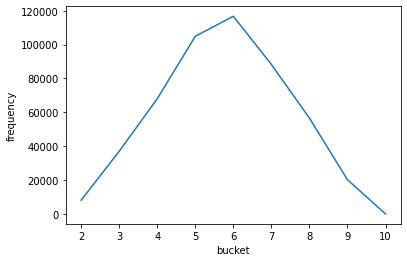

In [ ]:
# Построение гарфика
sns.lineplot(x=pd_df['bucket'], y=pd_df['frequency']);

**Анализ временных рядов**

In [ ]:
# сводная статистика
results = spark.sql('SELECT server_id, min(cpu), max(cpu), stddev(cpu) \
                                FROM vw_utilization \
                                GROUP BY server_id')

In [ ]:
results.show(10)

+---------+--------+--------+-------------------+
|server_id|min(cpu)|max(cpu)|        stddev(cpu)|
+---------+--------+--------+-------------------+
|      108|    0.55|    0.95|0.11563100171171926|
|      101|     0.6|     1.0|0.11651726263197697|
|      115|    0.44|    0.84|0.11569664615014985|
|      126|    0.48|    0.88|0.11542612970702051|
|      103|    0.56|    0.96|0.11617507884178278|
|      128|    0.38|    0.78| 0.1153254132405078|
|      122|    0.43|    0.83|0.11563104329209034|
|      111|    0.36|    0.76|0.11530221569464506|
|      120|    0.35|    0.75|0.11586355920838642|
|      117|    0.38|    0.78|0.11534593941519553|
+---------+--------+--------+-------------------+
only showing top 10 rows



**Функция окна / Перегородка**

In [ ]:
# Следующее для средней загрузки процессора будет рассчитано для раздела server_id. по сути, это еще один уровень расчета среднего значения.
results = spark.sql('SELECT event_datetime, server_id, cpu, \
                                avg(cpu) OVER (PARTITION BY server_id) AS avg_server_util \
                                FROM vw_utilization')

In [ ]:
results.show()

+-------------------+---------+----+-----------------+
|     event_datetime|server_id| cpu|  avg_server_util|
+-------------------+---------+----+-----------------+
|03/05/2019 08:06:14|      100|0.57|0.467506000000003|
|03/05/2019 08:11:14|      100|0.47|0.467506000000003|
|03/05/2019 08:16:14|      100|0.56|0.467506000000003|
|03/05/2019 08:21:14|      100|0.57|0.467506000000003|
|03/05/2019 08:26:14|      100|0.35|0.467506000000003|
|03/05/2019 08:31:14|      100|0.41|0.467506000000003|
|03/05/2019 08:36:14|      100|0.57|0.467506000000003|
|03/05/2019 08:41:14|      100|0.41|0.467506000000003|
|03/05/2019 08:46:14|      100|0.53|0.467506000000003|
|03/05/2019 08:51:14|      100|0.51|0.467506000000003|
|03/05/2019 08:56:14|      100|0.32|0.467506000000003|
|03/05/2019 09:01:14|      100|0.62|0.467506000000003|
|03/05/2019 09:06:14|      100|0.66|0.467506000000003|
|03/05/2019 09:11:14|      100|0.54|0.467506000000003|
|03/05/2019 09:16:14|      100|0.29|0.467506000000003|
|03/05/201

In [ ]:
# разница между средним использованием и каждым использованием
results = spark.sql('SELECT event_datetime, server_id, cpu, \
                                avg(cpu) OVER (PARTITION BY server_id) AS avg_server_util, \
                                cpu - (avg(cpu) OVER (PARTITION BY server_id)) AS delta_server_util \
                                FROM vw_utilization')

In [ ]:
results.show()

+-------------------+---------+----+-----------------+--------------------+
|     event_datetime|server_id| cpu|  avg_server_util|   delta_server_util|
+-------------------+---------+----+-----------------+--------------------+
|03/05/2019 08:06:14|      100|0.57|0.467506000000003| 0.10249399999999698|
|03/05/2019 08:11:14|      100|0.47|0.467506000000003|0.002493999999996...|
|03/05/2019 08:16:14|      100|0.56|0.467506000000003| 0.09249399999999708|
|03/05/2019 08:21:14|      100|0.57|0.467506000000003| 0.10249399999999698|
|03/05/2019 08:26:14|      100|0.35|0.467506000000003|  -0.117506000000003|
|03/05/2019 08:31:14|      100|0.41|0.467506000000003|  -0.057506000000003|
|03/05/2019 08:36:14|      100|0.57|0.467506000000003| 0.10249399999999698|
|03/05/2019 08:41:14|      100|0.41|0.467506000000003|  -0.057506000000003|
|03/05/2019 08:46:14|      100|0.53|0.467506000000003| 0.06249399999999705|
|03/05/2019 08:51:14|      100|0.51|0.467506000000003|0.042493999999997034|
|03/05/2019 

In [ ]:
# вычисление среднего значения ближайших соседей (это может быть среднее значение последних 3 значений и среднее значение следующих 3 значений)
results = spark.sql('SELECT event_datetime, server_id, cpu, \
                                avg(cpu) OVER (PARTITION BY server_id ORDER BY event_datetime \
                                ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING) AS avg_server_util \
                                FROM vw_utilization')

In [ ]:
results.show()

+-------------------+---------+----+-------------------+
|     event_datetime|server_id| cpu|    avg_server_util|
+-------------------+---------+----+-------------------+
|03/05/2019 08:06:14|      100|0.57|               0.52|
|03/05/2019 08:11:14|      100|0.47| 0.5333333333333333|
|03/05/2019 08:16:14|      100|0.56| 0.5333333333333333|
|03/05/2019 08:21:14|      100|0.57|0.49333333333333335|
|03/05/2019 08:26:14|      100|0.35| 0.4433333333333333|
|03/05/2019 08:31:14|      100|0.41|0.44333333333333336|
|03/05/2019 08:36:14|      100|0.57| 0.4633333333333333|
|03/05/2019 08:41:14|      100|0.41| 0.5033333333333333|
|03/05/2019 08:46:14|      100|0.53|0.48333333333333334|
|03/05/2019 08:51:14|      100|0.51|0.45333333333333337|
|03/05/2019 08:56:14|      100|0.32| 0.4833333333333334|
|03/05/2019 09:01:14|      100|0.62| 0.5333333333333333|
|03/05/2019 09:06:14|      100|0.66| 0.6066666666666667|
|03/05/2019 09:11:14|      100|0.54|0.49666666666666676|
|03/05/2019 09:16:14|      100|

In [ ]:
# ИМпорт определенных функций из библиотек
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

**Векторизация объектов, преобразование с помощью VectorAssembler**

In [ ]:
# Векторизация объектов по определенным столбцам
vector_assembler = VectorAssembler(inputCols=['cpu', 'free_memory', 'session_count'], outputCol='features')

In [ ]:
# преобразование путем передачи исходного фрейма данных
vcluster_df = vector_assembler.transform(df_util)

In [ ]:
vcluster_df.show(5)

+-------------------+---------+----+-----------+-------------+----------------+
|     event_datetime|server_id| cpu|free_memory|session_count|        features|
+-------------------+---------+----+-----------+-------------+----------------+
|03/05/2019 08:06:14|      100|0.57|       0.51|           47|[0.57,0.51,47.0]|
|03/05/2019 08:11:14|      100|0.47|       0.62|           43|[0.47,0.62,43.0]|
|03/05/2019 08:16:14|      100|0.56|       0.57|           62|[0.56,0.57,62.0]|
|03/05/2019 08:21:14|      100|0.57|       0.56|           50|[0.57,0.56,50.0]|
|03/05/2019 08:26:14|      100|0.35|       0.46|           43|[0.35,0.46,43.0]|
+-------------------+---------+----+-----------+-------------+----------------+
only showing top 5 rows



**Создание модели**

In [ ]:
kmeans = KMeans().setK(3)   # установите кластеры равными 3
kmeans = kmeans.setSeed(1)  # установите случайное начальное значение равным 1

In [ ]:
k_model = kmeans.fit(vcluster_df)  #подгонка модели с преобразованным df

In [ ]:
k_model.clusterCenters()         # получить центр кластеров

[array([ 0.62611189,  0.37364406, 70.02259966]),
 array([ 0.5172013 ,  0.48158347, 51.14110018]),
 array([ 0.71931575,  0.28104316, 88.23965784])]

**Векторизация объектов, преобразование с помощью VectorAssembler**

In [ ]:
# Векторизация по параметрам
vector_assembler = VectorAssembler(inputCols=['cpu'], outputCol='features')

In [ ]:
# преобразование путем передачи исходного фрейма данных
df_vutil = vector_assembler.transform(df_util)

In [ ]:
df_vutil.show(5)

+-------------------+---------+----+-----------+-------------+--------+
|     event_datetime|server_id| cpu|free_memory|session_count|features|
+-------------------+---------+----+-----------+-------------+--------+
|03/05/2019 08:06:14|      100|0.57|       0.51|           47|  [0.57]|
|03/05/2019 08:11:14|      100|0.47|       0.62|           43|  [0.47]|
|03/05/2019 08:16:14|      100|0.56|       0.57|           62|  [0.56]|
|03/05/2019 08:21:14|      100|0.57|       0.56|           50|  [0.57]|
|03/05/2019 08:26:14|      100|0.35|       0.46|           43|  [0.35]|
+-------------------+---------+----+-----------+-------------+--------+
only showing top 5 rows



**Создание и прогнозирование моделей**

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
# Использование линейной регрессии
linear_regression = LinearRegression(featuresCol='features', labelCol='session_count')

In [ ]:
lr_model = linear_regression.fit(df_vutil)

**Коэффициент и Y-перехват**

In [ ]:
# Вывод коэффициентов
lr_model.coefficients

DenseVector([47.024])

In [ ]:
# Вывод константы
lr_model.intercept

40.416951035516405

**Проверка RMSE**

In [ ]:
# Вывод суммарной среднеквадратичная ошибка
lr_model.summary.rootMeanSquaredError

12.837990225931378